# Load libraries

In [1]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline 
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib as mpl

C:\Users\Kat\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Kat\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Kat\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Kat\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\frame

# Load data

In [2]:
blue=pd.read_csv('fad_blue_rnadata.csv').rename(columns={"Unnamed: 0": "Cells"})
blue.set_index("Cells", drop=True,inplace=True)
blue=blue.T
#^transpose because we want genes to be features

In [3]:
idx=blue.index 
Y=blue['BlueFP']
x=blue.drop(['BlueFP'],axis=1)
#get top 200 genes from linear reg
genestokeep=pd.read_csv('data/top500_genes.csv').drop("Unnamed: 0",axis=1)['Genes']
x2=x.loc[:, x.columns.isin(genestokeep)]
genes=x2.columns
#set x and y
X=x2.to_numpy()

# Support Vector Regression

Try different kernels, parameters

In [4]:
epsilons=[0.4,0.5,0.6,0.7]
#linear kernel was best
Cs=[0.004,0.005,0.006,0.007]
gammas=['scale','auto']
funcs=['linear']
scores=0
MSEs=999999999999999
for n in Cs:
    for p in epsilons:
        for g in gammas:
            for f in funcs:
                #split into train and test
                X_train2, X_test2, y_train, y_test = train_test_split(X, Y, test_size=0.2)
                scaler = preprocessing.StandardScaler().fit(X_train2)
                #scale using x_train model for both train & test
                X_train = scaler.transform(X_train2) 
                X_test= scaler.transform(X_test2) 
                reg = SVR(kernel=f,C=n, epsilon=p,gamma=g)  
                reg.fit(X_train,y_train)
                scoretemp=reg.score(X_test,y_test) 
                y_pred=reg.predict(X_test)
                MSE_temp=np.sqrt(mean_squared_error(y_test,y_pred))
                print('C: '+str(n))
                print('Score: '+str(scoretemp))
                print('RMSE: '+str(MSE_temp))
                print('Epsilon: '+str(p))
                print('gamma: '+str(g))
                print('function type: '+str(f))
                print()
                if MSEs>MSE_temp:
                    MSEs=MSE_temp
                    scores=scoretemp
                    best_a=n
                    best_params=reg.get_params()
                    best_p=p
                    best_g=g
                    best_f=f
print('Best: ')
print('Score (D^2): '+str(scores)) 
print('Root mean squared error: '+str(MSEs)) 
print('C: '+str(best_a)) 
print('Epsilon: '+str(best_p)) 
print('gamma: '+str(best_g))
print('function: '+str(best_f))

C: 0.004
Score: 0.25729901280477185
RMSE: 5.923641656549942
Epsilon: 0.4
gamma: scale
function type: linear

C: 0.004
Score: 0.2294116139505541
RMSE: 6.262402216614111
Epsilon: 0.4
gamma: auto
function type: linear

C: 0.004
Score: 0.2437474934489734
RMSE: 6.326169950983845
Epsilon: 0.5
gamma: scale
function type: linear

C: 0.004
Score: 0.2508463992841765
RMSE: 5.847360349839863
Epsilon: 0.5
gamma: auto
function type: linear

C: 0.004
Score: 0.3439630867944077
RMSE: 4.885673686493997
Epsilon: 0.6
gamma: scale
function type: linear

C: 0.004
Score: 0.2226769577505071
RMSE: 5.9236588949910445
Epsilon: 0.6
gamma: auto
function type: linear

C: 0.004
Score: 0.2741665568464776
RMSE: 4.91972232883692
Epsilon: 0.7
gamma: scale
function type: linear

C: 0.004
Score: 0.24771813240906482
RMSE: 5.946751481711424
Epsilon: 0.7
gamma: auto
function type: linear

C: 0.005
Score: 0.24926498442023903
RMSE: 5.726136129453945
Epsilon: 0.4
gamma: scale
function type: linear

C: 0.005
Score: 0.30932549624

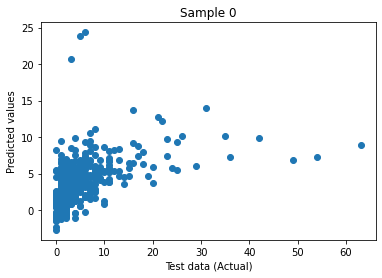

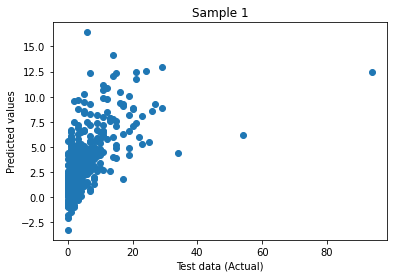

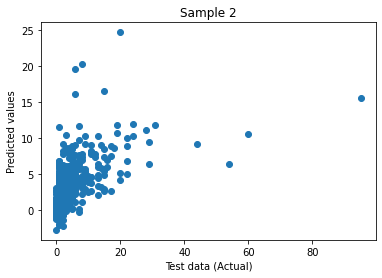

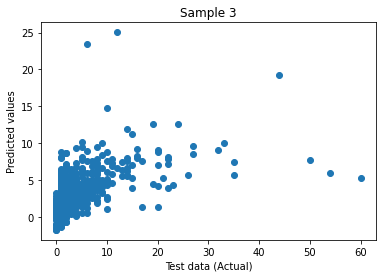

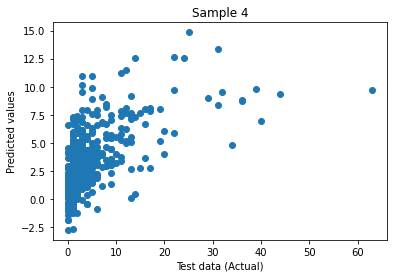

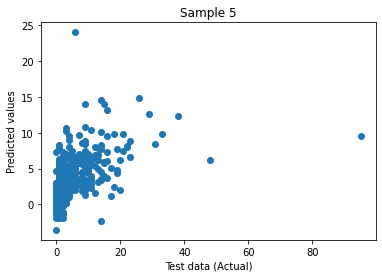

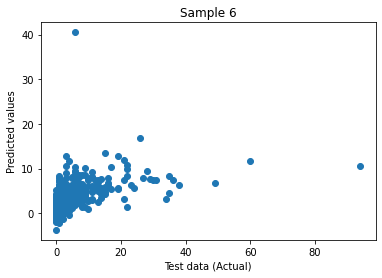

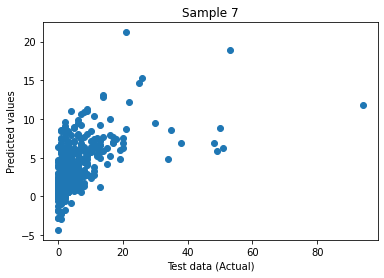

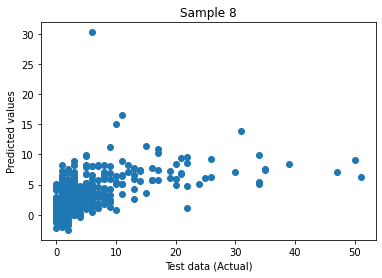

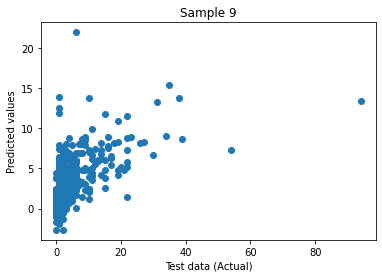

Average score (D^2): 
0.2609740160266359
Average root mean squared error: 
5.525792490166755


In [5]:
numruns=10
scores=0
MSEs=0
for n in range(numruns):
    #split into train and test
    X_train2, X_test2, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    scaler = preprocessing.StandardScaler().fit(X_train2)
    #scale using x_train model for both train & test
    X_train = scaler.transform(X_train2) 
    X_test= scaler.transform(X_test2) 
    reg = SVR(kernel=best_f,C=best_a, epsilon=best_p,gamma=best_g)  
    reg.fit(X_train,y_train)
    scoretemp=reg.score(X_test,y_test)
    scores+=scoretemp
    y_pred=reg.predict(X_test)
    MSEs+=np.sqrt(mean_squared_error(y_test,y_pred))
    plt.scatter(y_test,y_pred)
    plt.xlabel('Test data (Actual)')
    plt.ylabel('Predicted values')
    plt.title('Sample '+str(n))
    plt.show()
print('Average score (D^2): ')
print(scores/numruns)
print('Average root mean squared error: ')
print(MSEs/numruns)